<h1>Data Cleaning</h1>

<h2>Load Scraped Data</h2>

In [85]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
combined_articles = pd.read_csv("combined_articles_final.csv")
display(combined_articles.head())
display(combined_articles.shape)

,id,title,link,content,gold_label
0,0,ہم لکھنے والے ایک بے ایمان معاشرہ میں سانس لے ...,https://urdu.arynews.tv/intezar-hussain-urdu-w...,میں سوچتا ہوں کہ ہم غالب سے کتنے مختلف زمانے م...,entertainment
1,1,’’کیا اُدھر باغ بھی ہے؟‘‘,https://urdu.arynews.tv/lakhnau-nawab-mahalsara/,محمد حسین آزاد نے میر کے بارے میں ایک واقعہ ل...,entertainment
2,2,کچھ زخمی کہہ رہے تھے کہ وہ زندہ ہیں…,https://urdu.arynews.tv/politics-and-politicia...,وطنِ عزیز کی سیاست کا دار و مدار اب اس پر رہ گ...,entertainment
3,3,آگرے والا عبدالکریم اور ملکہ وکٹوریہ,https://urdu.arynews.tv/munshi-abdul-karim-and...,بہت پیارے شوہر البرٹ اور بے حد عزیز ملازم جان ...,entertainment
4,4,"""چچی سیدانی تھیں….”",https://urdu.arynews.tv/aslam-parvez-khaka/,خاکہ نگاری اردو میں‌ ایک مقبول صنف رہی ہے۔ زیا...,entertainment


(1495, 5)

<h2>Dealing with Missing Values</h2>

In [87]:
combined_articles.isna().sum()

id            0
title         8
link          8
content       8
gold_label    0
dtype: int64

In [88]:
# Removing a max of 24 articles from our dataset would get rid of less than 3% of our data and we'd still keep it above 1000 articles, making it safe to do so

combined_articles = combined_articles.dropna(ignore_index=True)
combined_articles.tail()

,id,title,link,content,gold_label
1482,1490,حماس کی جانب سے رہا کی گئی اسرائیلی لڑکی نے من...,https://jang.com.pk/news/1415862,حماس کی جانب سے رہا کی جانے والی اسرائیلی نوج...,international
1483,1491,روسی صدر پیوٹن کی انجیلا مرکل کو کتے سے ڈرانے ...,https://jang.com.pk/news/1415855,روس کے صدر ولادیمیر پیوٹن نے سابق جرمن چانسل...,international
1484,1492,چین میں دنیا کا سب سے بڑا سونے کا ذخیرہ دریافت,https://jang.com.pk/news/1415840,دنیا کا سب سے بڑا سونے کا ذخیرہ چین میں دریاف...,international
1485,1493,یوکرین کو جوہری ہتھیار ملے تو تمام فوجی وسائل ...,https://jang.com.pk/news/1415837,روس کے صدر ولادیمیر پیوٹن نے کہا ہے کہ یوک...,international
1486,1494,ایران کو جوہری بم حاصل کرنے سے روکنے کیلئے سب ...,https://jang.com.pk/news/1415836,اسرائیلی وزیرِ اعظم نیتن یاہو نے کہا ہے کہ ای...,international


<h2>Checking For Duplicate IDs</h2>

In [89]:
print("Duplicate IDs Before:", combined_articles['id'].duplicated().sum())
# shows ids are duplicated

# now we change id to have row numbers in order
combined_articles['id'] = range(len(combined_articles))
print("Duplicate IDs After:", combined_articles['id'].duplicated().sum())

Duplicate IDs Before: 0
Duplicate IDs After: 0


<h2>Checking Labels and their Ratios</h2>

In [90]:
display(combined_articles.head())
display(combined_articles['gold_label'].value_counts())

,id,title,link,content,gold_label
0,0,ہم لکھنے والے ایک بے ایمان معاشرہ میں سانس لے ...,https://urdu.arynews.tv/intezar-hussain-urdu-w...,میں سوچتا ہوں کہ ہم غالب سے کتنے مختلف زمانے م...,entertainment
1,1,’’کیا اُدھر باغ بھی ہے؟‘‘,https://urdu.arynews.tv/lakhnau-nawab-mahalsara/,محمد حسین آزاد نے میر کے بارے میں ایک واقعہ ل...,entertainment
2,2,کچھ زخمی کہہ رہے تھے کہ وہ زندہ ہیں…,https://urdu.arynews.tv/politics-and-politicia...,وطنِ عزیز کی سیاست کا دار و مدار اب اس پر رہ گ...,entertainment
3,3,آگرے والا عبدالکریم اور ملکہ وکٹوریہ,https://urdu.arynews.tv/munshi-abdul-karim-and...,بہت پیارے شوہر البرٹ اور بے حد عزیز ملازم جان ...,entertainment
4,4,"""چچی سیدانی تھیں….”",https://urdu.arynews.tv/aslam-parvez-khaka/,خاکہ نگاری اردو میں‌ ایک مقبول صنف رہی ہے۔ زیا...,entertainment


gold_label
entertainment         300
sports                300
business              299
science-technology    200
world                 200
international          98
Entertainment          18
Business               18
Sports                 18
Science-Technology     18
World                  18
Name: count, dtype: int64

In [91]:
# Combining same labels
combined_articles['gold_label'] = combined_articles['gold_label'].replace({'Science-Technology': 'science-technology',
                                                                          'Entertainment': 'entertainment',
                                                                          'Business': 'business',
                                                                          'Sports': 'sports',
                                                                          'World': 'world',
                                                                          'international': 'world'})

display(combined_articles['gold_label'].value_counts())

gold_label
entertainment         318
sports                318
business              317
world                 316
science-technology    218
Name: count, dtype: int64

<h2>Clean Content Text</h2>

In [92]:
stopwords = {
    'اور', 'ایک', 'کو', 'ہے', 'میں', 'کی', 'سے', 'پر', 'ہو', 'یہ', 'کا', 'اس', 'کہ', 'کر', 'تھا', 'تھی', 'تھے', 
    'لیے', 'بھی', 'نے', 'جو', 'ہوا', 'وہ', 'کیا', 'جا', 'نہ', 'تو', 'یا', 'کرنے', 'گیا', 'کر', 'دیا', 
    'لیکن', 'بہت', 'آپ', 'ہم', 'سب', 'کچھ', 'اپنے', 'ان', 'کردی', 'اگر', 'ہوتی', 'اب', 'مجھے', 'اسی', 'جس', 'اسے', 
    'اپنی', 'کسی', 'ہوتا', 'انہوں', 'تھیں', 'کہا', 'جب', 'اُس', 'کل', 'کوئی', 'ہوتے', 'تم', 'کس', 'رہا', 'کن', 'ایسے', 
    'جاتا', 'اسی', 'اُن', 'رہے', 'گئے', 'جاتی', 'تھے', 'اُنہوں', 'اُسی', 'بنی', 'بعد', 'چاہیے', 'بین', 'پھر', 'اُنکا', 'ہونے'
}

def clean_data(text, stop_words):
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'[^ا-ی0-9\s]', '', text)
    text = text.lower()
    text = re.sub(r'\s+', ' ', text).strip()

    clean_text = ' '.join([word for word in text.split() if word not in stop_words])
        
    return clean_text

combined_articles['content'] = combined_articles['content'].apply(lambda x: clean_data(x, stopwords))
combined_articles['content'].head()

0    سوچتا ہوں غالب س کتن مختلف زمان جی رہ ہیں شخص ...
1    محمد حسین آزاد ن میر ک بار واقعہ لکھا ہ انھوں...
2    وطنِ عزیز سیاست دار و مدار رہ ہ جماعت ن کتنا ب...
3    پیار شوہر البرٹ ب حد عزیز ملازم جان بران ک مرن...
4    خاکہ نگاری اردو مقبول صنف رہی ہ زیادہ تر اہلِ ...
Name: content, dtype: object

<h2>Write Back New CSV File</h2>

In [93]:
combined_articles.to_csv('combined_articles_final.csv', index=False)

<h1>Exploratory Data Analysis</h1>

## Articles in to Bag of Words

In [94]:
class BagOfWords:
    def __init__(self):
        self.vocabulary_ = {}
        self.vocabulary_size_ = 0
    
    def fit(self, corpus):
        word_set = set()
        for sentence in corpus:
            word_set.update(sentence.split())
        
        self.vocabulary_ = {word: idx for idx, word in enumerate(sorted(word_set))}
        self.vocabulary_size_ = len(self.vocabulary_)
    
    def vectorize(self, sentence):
        words = sentence.split()
        vector = np.zeros(self.vocabulary_size_, dtype=int)
        for word in words:
            if word in self.vocabulary_:
                vector[self.vocabulary_[word]] += 1
        return vector

In [95]:
bow = BagOfWords()
bow.fit(combined_articles['content'])

content_vector = np.array([bow.vectorize(text) for text in combined_articles['content']])
content_vector.shape

(1487, 19408)

#### Article Category Distribution

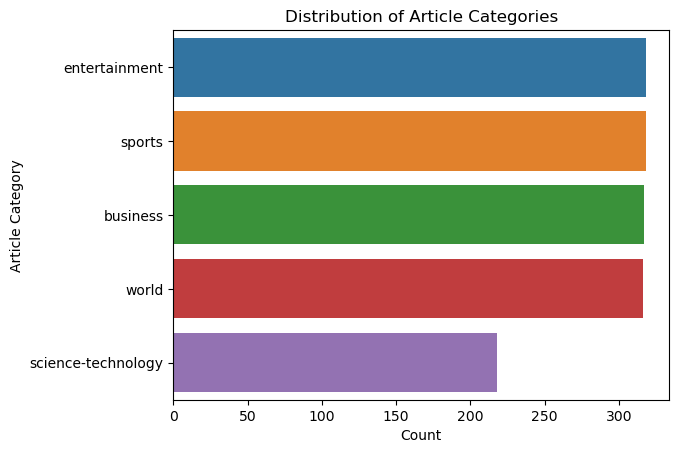

In [96]:
# Plot category distribution
sns.countplot(y=combined_articles['gold_label'], order=combined_articles['gold_label'].value_counts().index)
plt.title('Distribution of Article Categories')
plt.xlabel('Count')
plt.ylabel('Article Category')
plt.show()

#### Article Lengths

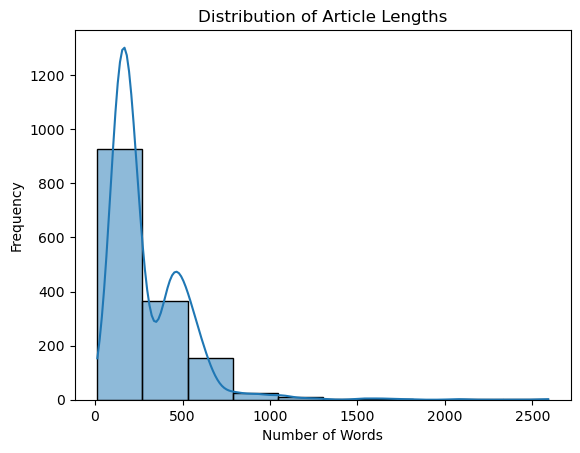

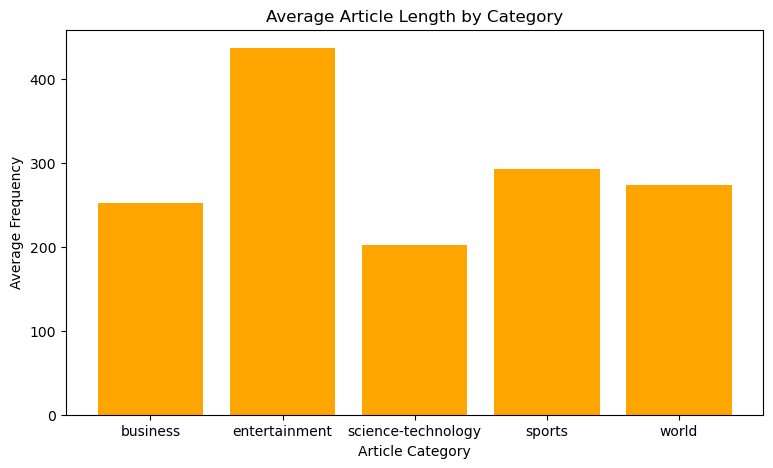

In [103]:
combined_articles['article_len'] = combined_articles['content'].apply(lambda x: len(x.split()))

sns.histplot(combined_articles['article_len'], kde=True, bins=10)
plt.title('Distribution of Article Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# Average article length by category
length_by_category = combined_articles.groupby('gold_label')['article_len'].mean()
plt.figure(figsize=(9,5))
plt.bar(length_by_category.keys(), length_by_category, color='orange')
plt.title('Average Article Length by Category')
plt.xlabel('Article Category')
plt.ylabel('Average Frequency')
plt.show()